# Artificial Neural Network

### Importing the libraries

In [1]:
#pip install tensorflow

In [2]:
#pip show tensorflow

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [6]:
dataset.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [8]:
print(X)

[[619 'Female' 42 ... 1 1 101348.88]
 [608 'Female' 41 ... 0 1 112542.58]
 [502 'Female' 42 ... 1 0 113931.57]
 ...
 [709 'Female' 36 ... 0 1 42085.58]
 [772 'Male' 42 ... 1 0 92888.52]
 [792 'Female' 28 ... 1 0 38190.78]]


In [9]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])

In [11]:
print(X)

[[619 0 42 ... 1 1 101348.88]
 [608 0 41 ... 0 1 112542.58]
 [502 0 42 ... 1 0 113931.57]
 ...
 [709 0 36 ... 0 1 42085.58]
 [772 1 42 ... 1 0 92888.52]
 [792 0 28 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
X_train.shape , y_train.shape

((8000, 9), (8000,))

In [14]:
X_test.shape , y_test.shape

((2000, 9), (2000,))

### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train

array([[ 0.16958176, -1.09168714, -0.46460796, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.91601335,  0.30102557, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -1.09168714, -0.94312892, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 ,  0.91601335, -0.36890377, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -1.09168714, -0.08179119, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079, -1.09168714,  0.87525072, ...,  0.64259497,
        -1.03227043,  0.32472465]])

## Part 2 - Building the ANN

### Initializing the ANN

In [17]:
ann = tf.keras.models.Sequential()

### Adding the input layer

In [18]:
ann.add(tf.keras.layers.Dense(units=9, activation='relu'))

### Adding the hidden layers

In [19]:
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))  ### hidden layer 1

ann.add(tf.keras.layers.Dense(units=16, activation='relu'))  ### hidden layer 2

ann.add(tf.keras.layers.Dense(units=8, activation='relu'))   ### hidden layer 3

### Adding the output layer

In [20]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [21]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [22]:
ann.fit(X_train, y_train, batch_size = 100, epochs = 50)

Epoch 1/50


80/80 [==============================] - 1s 2ms/step - loss: 0.6591 - accuracy: 0.6852
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.7960
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7960
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.7974
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8002
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8158
Epoch 7/50
80/80 [==============================] - 0s 1ms/step - loss: 0.3914 - accuracy: 0.8310
Epoch 8/50
80/80 [==============================] - 0s 1ms/step - loss: 0.3775 - accuracy: 0.8379
Epoch 9/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8439
Epoch 10/50
80/80 [==============================] - 0s 1ms/step - loss: 0.3667 - accuracy: 0.8424
Epoch 11/50
80/80

In [23]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (100, 9)                  90        
                                                                 
 dense_1 (Dense)             (100, 16)                 160       
                                                                 
 dense_2 (Dense)             (100, 16)                 272       
                                                                 
 dense_3 (Dense)             (100, 8)                  136       
                                                                 
 dense_4 (Dense)             (100, 1)                  9         
                                                                 
Total params: 667 (2.61 KB)
Trainable params: 667 (2.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
y_pred_tr = ann.predict(X_train)

250/250 [==============================] - 1s 1ms/step


In [25]:
y_pred_tr

array([[0.02935888],
       [0.34995076],
       [0.19166099],
       ...,
       [0.10672961],
       [0.02265259],
       [0.6438858 ]], dtype=float32)

In [26]:
y_pred_tr = (y_pred_tr > 0.5)
print(np.concatenate((y_pred_tr.reshape(len(y_pred_tr),1), y_train.reshape(len(y_train),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [27]:
import sklearn.metrics as metrics
print("Accuracy :", metrics.roc_auc_score(y_train, y_pred_tr))

Accuracy : 0.6817543600354715


Text(0.5, 23.52222222222222, 'Predicted')

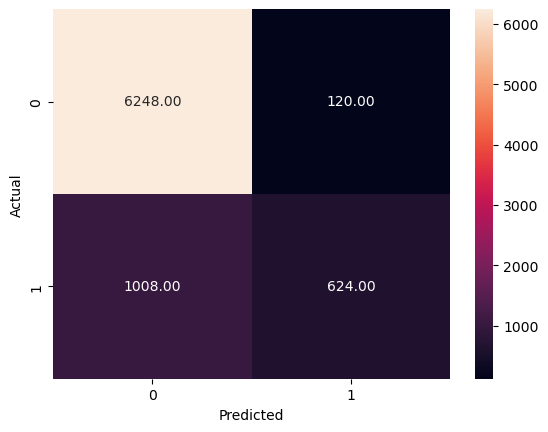

In [28]:
from sklearn.metrics import confusion_matrix

log_cm = confusion_matrix(y_train, y_pred_tr.reshape(len(y_pred_tr),1))

sns.heatmap(log_cm, annot=True, fmt='.2f',
         xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )

plt.ylabel('Actual')
plt.xlabel('Predicted')

### Predicting the Test set results

In [29]:
y_pred_tst = ann.predict(X_test)
y_pred_tst = (y_pred_tst > 0.5)
print(np.concatenate((y_pred_tst.reshape(len(y_pred_tst),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [30]:
print("Accuracy :", metrics.roc_auc_score(y_test, y_pred_tst))

Accuracy : 0.6893223421959055


Text(0.5, 23.52222222222222, 'Predicted')

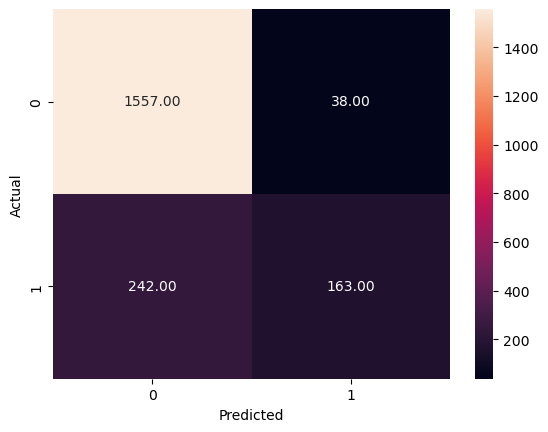

In [31]:
from sklearn.metrics import confusion_matrix

log_cm = confusion_matrix(y_test, y_pred_tst.reshape(len(y_pred_tst),1))

sns.heatmap(log_cm, annot=True, fmt='.2f',
         xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )

plt.ylabel('Actual')
plt.xlabel('Predicted')

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank or not: 


Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [32]:
print(ann.predict(sc.transform([[600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 25ms/step
[[False]]


In [33]:
#print(ann.predict(sc.transform([[300, 0, 60, 1, 600, 1, 0, 0, 500]])) > 0.5)

### Save the Model

In [34]:
### import load_mode
from keras.models import load_model 

### save the model as .h5 file
ann.save("ann_clf.h5") 

### load the saved model
ann_model = load_model("ann_clf.h5") 

C:\Users\Bhaskar Kumbhar\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
loss, accuracy = ann_model.evaluate(X_test, y_test) 

63/63 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8600


In [36]:
### prediction for future data

print(ann_model.predict(sc.transform([[600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 69ms/step
[[False]]
